We are first going to clean our data. We will explain the choice of code as we go.

In [2]:
import pandas as pd

In [3]:
import os
print(os.getcwd())

c:\Users\user\Desktop\Phase_1_Project2


In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\Phase_1_Project\data\Aviation_Data.csv")
df

C:\Users\user\AppData\Local\Temp\ipykernel_8968\3185327055.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\user\Desktop\Phase_1_Project\data\Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
df.shape

(90348, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

We have missing data in some columns. We will drop some columns and fill others. We will look at the columns that have missing data.

In [12]:
df.isnull().sum

<bound method DataFrame.sum of        Event.Id  Investigation.Type  Accident.Number  Event.Date  Location  \
0         False               False            False       False     False   
1         False               False            False       False     False   
2         False               False            False       False     False   
3         False               False            False       False     False   
4         False               False            False       False     False   
...         ...                 ...              ...         ...       ...   
90343     False               False            False       False     False   
90344     False               False            False       False     False   
90345     False               False            False       False     False   
90346     False               False            False       False     False   
90347     False               False            False       False     False   

       Country  Latitude  Longit

In [13]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [16]:
df.drop (columns='Latitude', inplace=True)

In [17]:
df.drop (columns='Longitude', inplace=True)

In [18]:
df.drop (columns='Aircraft.Category', inplace=True)

In [19]:
df.drop (columns='FAR.Description', inplace=True)

In [20]:
df.drop (columns='Schedule', inplace=True)

In [21]:
df.drop (columns='Air.carrier', inplace=True)

In [22]:
df.shape

(90348, 25)

In [23]:
df.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [24]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [25]:
df.duplicated().value_counts()

False    88958
True      1390
Name: count, dtype: int64

In [26]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: int64

In [27]:
df.drop (columns='Airport.Code', inplace=True)

In [28]:
df.drop (columns='Airport.Name', inplace=True)

In [29]:
df.drop (columns='Broad.phase.of.flight', inplace=True)

In [30]:
df.drop (columns='Publication.Date', inplace=True)

In [31]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Report.Status              7843
dtype: int64

In [36]:
df = df.dropna(subset=['Accident.Number'])

In [37]:
df = df.dropna(subset=['Event.Id'])

In [47]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
dtype: int64

In [48]:
df.dropna(subset=['Location'])


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [49]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
dtype: int64

In [50]:
df['Total.Fatal.Injuries']=df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median())

In [51]:
df['Total.Serious.Injuries']=df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median())

In [52]:
df['Total.Uninjured']=df['Total.Uninjured'].fillna(df['Total.Uninjured'].median())

In [54]:
df['Total.Minor.Injuries']=df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median())

In [58]:
df.dropna(subset=['Make'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [59]:
df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                    52
Country                    226
Injury.Severity           1000
Aircraft.damage           3194
Registration.Number       1382
Make                        63
Model                       92
Amateur.Built              102
Number.of.Engines         6084
Engine.Type               7096
Purpose.of.flight         6192
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition         4492
Report.Status             6384
dtype: int64

In [63]:
df=df.dropna(subset=['Location'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,No,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,No,1.0,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [65]:
df=df.dropna(subset=['Country'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,No,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,No,1.0,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [66]:
df=df.dropna(subset=['Injury.Severity'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90341,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,Minor,NaN,N321GD,GRUMMAN AMERICAN AVN. CORP.,...,No,1.0,NaN,Instructional,0.0,1.0,0.0,1.0,NaN,NaN
90342,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,Fatal,NaN,PP-IRC,AIR TRACTOR,...,No,1.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN


In [67]:
df=df.dropna(subset=['Aircraft.damage'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,C-GZPU,PIPER,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,N416PC,CIRRUS DESIGN CORP,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,N398KL,SWEARINGEN,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,N5405V,CESSNA,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [69]:
df=df.dropna(subset=['Registration.Number'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,C-GZPU,PIPER,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,N416PC,CIRRUS DESIGN CORP,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,N398KL,SWEARINGEN,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,N5405V,CESSNA,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [70]:
df=df.dropna(subset=['Make'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,C-GZPU,PIPER,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,N416PC,CIRRUS DESIGN CORP,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,N398KL,SWEARINGEN,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,N5405V,CESSNA,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [71]:
df=df.dropna(subset=['Model'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,C-GZPU,PIPER,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,N416PC,CIRRUS DESIGN CORP,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,N398KL,SWEARINGEN,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,N5405V,CESSNA,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [73]:
df=df.dropna(subset=['Amateur.Built'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1.0,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,C-GZPU,PIPER,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,N416PC,CIRRUS DESIGN CORP,...,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,N398KL,SWEARINGEN,...,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,N5405V,CESSNA,...,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [74]:
df=df.dropna(subset=['Engine.Type'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,No,2.0,Turbo Fan,NaN,0.0,0.0,1.0,44.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilots failure to maintain control of the...
90106,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,An in-flight collision with a bird while on ap...
90120,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilot did not ensure adequate clearance fr...
90194,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,...,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,The pilots failure to secure the magneto swit...


In [75]:
df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight         2118
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition          651
Report.Status             1310
dtype: int64

In [76]:
df=df.dropna(subset=['Purpose.of.flight'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilots failure to maintain control of the...
90106,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,An in-flight collision with a bird while on ap...
90120,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilot did not ensure adequate clearance fr...
90194,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,...,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,The pilots failure to secure the magneto swit...


In [78]:
df=df.dropna(subset=['Weather.Condition'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilots failure to maintain control of the...
90106,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,An in-flight collision with a bird while on ap...
90120,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilot did not ensure adequate clearance fr...
90194,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,...,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,The pilots failure to secure the magneto swit...


In [79]:
df=df.dropna(subset=['Report.Status'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilots failure to maintain control of the...
90106,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,...,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,An in-flight collision with a bird while on ap...
90120,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilot did not ensure adequate clearance fr...
90194,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,...,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,The pilots failure to secure the magneto swit...


In [80]:
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [81]:
df.shape

(75912, 21)

After dropping and filling columns and rows, we are going to remove whitespaces and special characters like '#','.',',' that are spread throughout our dataset.

In [83]:
import re
df = df.applymap(lambda x: re.sub(r"[#.,]", "", x) if isinstance(x, str) else x)

C:\Users\user\AppData\Local\Temp\ipykernel_19144\65592945.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: re.sub(r"[#.,]", "", x) if isinstance(x, str) else x)


In [84]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\user\AppData\Local\Temp\ipykernel_19144\242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [85]:
columns_with_spaces = [
    col for col in df.columns 
    if df[col].apply(lambda x: isinstance(x, str) and (x != x.strip())).any()
]
print(columns_with_spaces)

[]


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75912 entries, 0 to 90226
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                75912 non-null  object 
 1   Investigation.Type      75912 non-null  object 
 2   Accident.Number         75912 non-null  object 
 3   Event.Date              75912 non-null  object 
 4   Location                75912 non-null  object 
 5   Country                 75912 non-null  object 
 6   Injury.Severity         75912 non-null  object 
 7   Aircraft.damage         75912 non-null  object 
 8   Registration.Number     75912 non-null  object 
 9   Make                    75912 non-null  object 
 10  Model                   75912 non-null  object 
 11  Amateur.Built           75912 non-null  object 
 12  Number.of.Engines       75912 non-null  float64
 13  Engine.Type             75912 non-null  object 
 14  Purpose.of.flight       75912 non-null  obj

Our data is now clean for visualization and further analysis.

In [6]:
import matplotlib.pyplot as plt

Visualization of Accident frequency by Aircraft Manufacturer

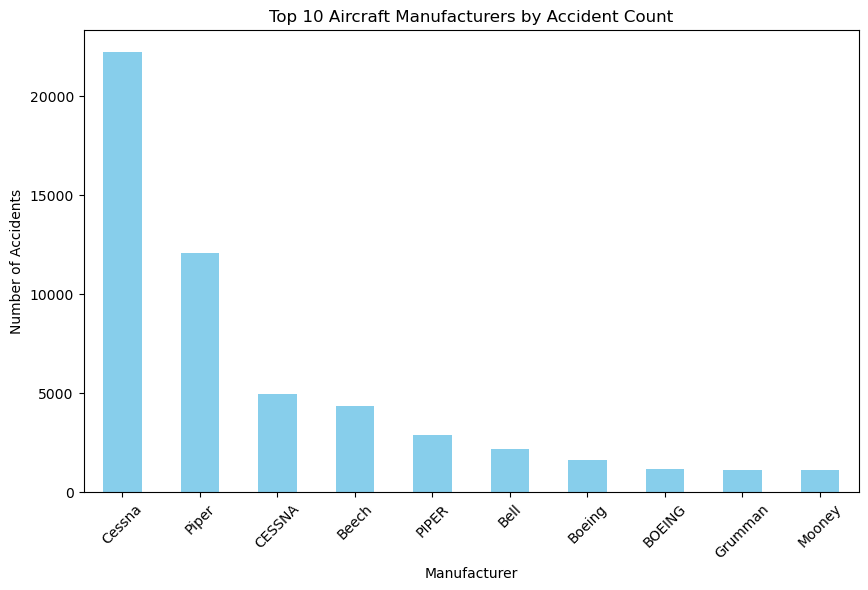

In [7]:
manufacturer_counts = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Aircraft Manufacturers by Accident Count")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

Visualization of the Distribution of accidents by severity

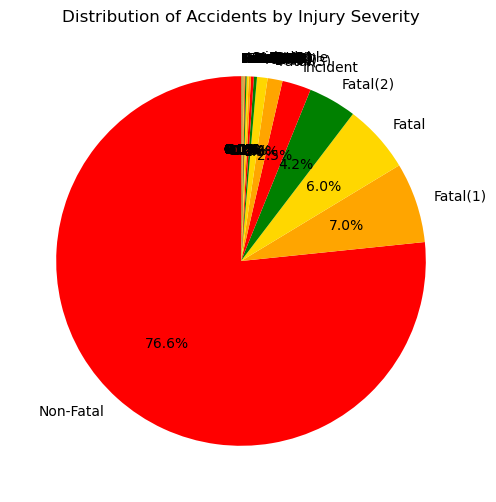

In [9]:
severity_counts = df['Injury.Severity'].value_counts()
plt.figure(figsize=(6,6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red','orange','gold','green'])
plt.title("Distribution of Accidents by Injury Severity")
plt.ylabel("")
plt.show()

Visualization of Trends of accidents overtime

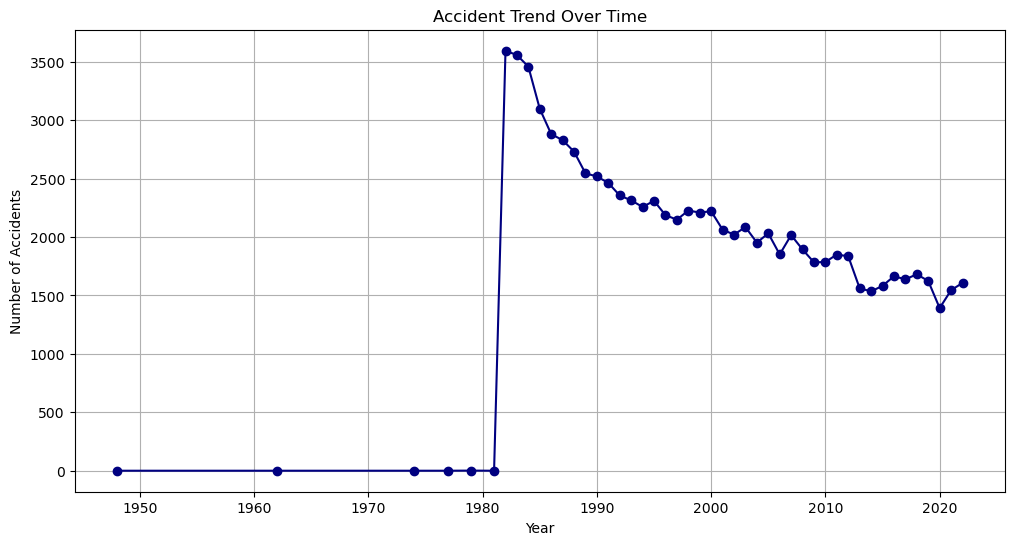

In [10]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

df['Year'] = df['Event.Date'].dt.year
accidents_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
accidents_per_year.plot(kind='line', marker='o', color='navy')
plt.title("Accident Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()